# REGRESI

## Ridho Chaerullah 202231122

### Import Library

In [2]:
import numpy as np # Mengimpor library NumPy untuk operasi numerik.
import pandas as pd # Mengimpor library Pandas untuk manipulasi data.
from matplotlib import pyplot as plt # Mengimpor pyplot dari Matplotlib untuk visualisasi data.
from sklearn.linear_model import LinearRegression # Mengimpor LinearRegression dari Scikit-Learn untuk membuat model regresi linear.

### Membaca file

In [3]:
# Membaca data dari file CSV bernama R04_corruptions.csv dan menyimpannya ke dalam DataFrame df
df = pd.read_csv('R04_corruptions.csv')
df.head() # Menampilkan lima baris pertama dari DataFrame df

,Corruption Perception (X),Government Transparency (Y)
0,3.2,65
1,2.5,72
2,4.1,58
3,2.8,68
4,3.5,60


### Cek baris yang kosong

In [4]:
# Mengecek apakah ada nilai yang hilang (NaN) di dalam data dan menampilkan jumlahnya di setiap kolom.
df.isna().sum()

Corruption Perception (X)      0
Government Transparency (Y)    0
dtype: int64

### Penyelesaian

In [5]:
# Mengubah nama kolom DataFrame df menjadi x dan y untuk kemudahan analisis.
df.columns = ['x', 'y']
print(df) # Menampilkan isi dari DataFrame df.

      x   y
0   3.2  65
1   2.5  72
2   4.1  58
3   2.8  68
4   3.5  60
5   2.4  75
6   3.9  55
7   2.7  70
8   3.8  57
9   2.9  71
10  4.2  54
11  2.6  73
12  3.0  65
13  2.3  76
14  4.0  56
15  3.4  62
16  2.2  78
17  4.3  53
18  3.3  63
19  2.1  80
20  4.4  52
21  3.7  59
22  2.0  82
23  4.5  51
24  3.6  61
25  2.8  69
26  4.2  55
27  3.1  66
28  2.7  72
29  4.3  54
30  3.9  57
31  2.5  70
32  4.4  53
33  3.0  65
34  2.6  73
35  4.1  58
36  3.2  68
37  2.4  75
38  4.5  51
39  3.5  60
40  2.9  71
41  3.8  56
42  2.3  76
43  4.0  52
44  3.4  62
45  2.2  78
46  4.4  53
47  3.3  63
48  2.1  80
49  4.3  54
50  3.7  59
51  2.0  82
52  4.5  61
53  3.6  69
54  2.8  50


In [6]:
# Menghitung korelasi antara variabel x dan y untuk melihat hubungan linear di antara keduanya.
df.corr()

,x,y
x,1.000000,-0.920063
y,-0.920063,1.000000


In [7]:
x_train = df['x'].values[:, np.newaxis] # Mengambil kolom x sebagai array dua dimensi untuk variabel independen dalam pelatihan model.
y_train = df['y'].values # Mengambil kolom y sebagai variabel dependen untuk pelatihan model.

lm = LinearRegression() # Membuat instance dari model LinearRegression.
lm.fit(x_train, y_train) # Melatih model dengan data x_train dan y_train.

LinearRegression()

In [8]:
# Mendefinisikan data uji untuk prediksi dengan model.
x_test = [[3.5], [2.4], [2.1], [1.9], [4]]
p = lm.predict(x_test) # Melakukan prediksi pada x_test menggunakan model regresi yang sudah dilatih.
print(p) # Menampilkan hasil prediksi dari x_test.

[62.04023982 74.05585217 77.33283736 79.51749415 56.57859784]


In [9]:
print('Coefficient: ' + str(lm.coef_)) # Menampilkan koefisien (slope) dari model regresi.
print('Intercept: ' + str(lm.intercept_)) # Menampilkan nilai intercept dari model regresi.

Coefficient: [-10.92328395]
Intercept: 100.27173366009497


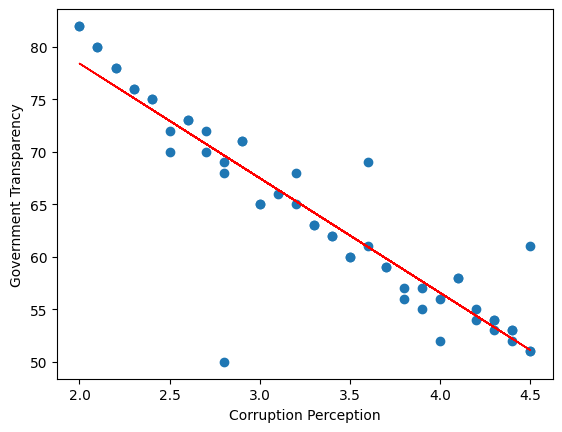

In [10]:
pb = lm.predict(x_train) # Melakukan prediksi untuk data pelatihan x_train.
dfc = pd.DataFrame({'x' : df['x'], 'y' : pb}) # Membuat DataFrame baru dfc yang berisi x dari data asli dan prediksi y untuk visualisasi.

plt.scatter(df['x'], df['y']) # Membuat plot sebar untuk data asli.
plt.plot(dfc['x'], dfc['y'], color='red', linewidth=1) # Membuat plot garis untuk prediksi model dengan warna merah untuk menunjukkan garis regresi.
plt.xlabel("Corruption Perception") # Menambahkan label x pada grafik dengan nama "Corruption Perception".
plt.ylabel("Government Transparency") # Menambahkan label y pada grafik dengan nama "Government Transparency".
plt.show() # Menampilkan grafik yang telah dibuat.

In [11]:
y_asli = [65, 72, 58] # Mendefinisikan daftar nilai y_asli sebagai nilai aktual untuk mengevaluasi akurasi prediksi model.
y_hasil_prediksi = lm.predict([[3.2], [2.5], [4.1]]) # Melakukan prediksi dengan model untuk data baru.
print(y_hasil_prediksi) # Menampilkan hasil prediksi untuk nilai y_hasil_prediksi.

[65.31722501 72.96352377 55.48626945]


In [12]:
from sklearn.metrics import mean_squared_error # Mengimpor fungsi mean_squared_error dari Scikit-Learn untuk menghitung rata-rata error kuadrat.

mse = mean_squared_error(y_asli, y_hasil_prediksi) # Menghitung nilai Mean Squared Error (MSE) antara y_asli dan y_hasil_prediksi.
print("Mean Squared Error:", mse) # Menampilkan nilai MSE untuk melihat tingkat kesalahan model

Mean Squared Error: 2.449283686828784


In [13]:
from sklearn.metrics import r2_score # Mengimpor fungsi r2_score untuk mengukur akurasi model.
akurasi = r2_score(y_asli, y_hasil_prediksi) # Menghitung nilai R² untuk mengetahui seberapa baik model dapat menjelaskan variasi dalam data.
print(akurasi*100) # Menampilkan persentase akurasi model berdasarkan nilai R².

92.50219279542209
